In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#connect to data
# load the data into a pandas dataframe

data_path = '/content/drive/MyDrive/Machine Learning/Colab Notebooks/Organics Project/organics.csv'
df = pd.read_csv(data_path)

# preview data
df.info()
df.head
print(df)

# total count of NaN values
print(df.isnull().sum())

#print percent missing per column
null_percentages = (df.isnull().sum() / len(df)) * 100

print(null_percentages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
             ID  DemAffl  DemAge  DemCluster DemClusterGroup DemGender  \
0           140     10.0    76.0        16.0               C     

In [4]:
# Convert response from an integer to a categorical variable
df['TargetBuy'] = df['TargetBuy'].astype('category')
df.head()


#Turn missing values in gender column into 'Unknown'
df['DemGender'] = df['DemGender'].fillna("U")

#drop ID column
df.drop('ID', axis=1, inplace=True)

#remove rest of null values
newdf = df.dropna()

print(len(newdf))

18510


In [15]:
cluster_df = pd.get_dummies(newdf, columns=['DemCluster','DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass'], drop_first=True, dtype='float')
cluster_df['TargetBuy'] = cluster_df['TargetBuy'].astype(float)
print(cluster_df)

cluster_df.info()
cluster_df.head()

       DemAffl  DemAge  PromSpend  PromTime  TargetBuy  TargetAmt  \
0         10.0    76.0   16000.00       4.0        0.0          0   
1          4.0    49.0    6000.00       5.0        0.0          0   
2          5.0    70.0       0.02       8.0        1.0          1   
3         10.0    65.0       0.01       7.0        1.0          1   
4         11.0    68.0       0.01       8.0        0.0          0   
...        ...     ...        ...       ...        ...        ...   
22218     13.0    65.0    1500.00       5.0        0.0          0   
22219     15.0    73.0    6053.06      12.0        0.0          0   
22220      9.0    70.0    6000.00       5.0        0.0          0   
22221     11.0    66.0    5000.00       5.0        0.0          0   
22222      3.0    75.0    6000.00       2.0        0.0          0   

       DemCluster_2.0  DemCluster_3.0  DemCluster_4.0  DemCluster_5.0  ...  \
0                 0.0             0.0             0.0             0.0  ...   
1              

,DemAffl,DemAge,PromSpend,PromTime,TargetBuy,TargetAmt,DemCluster_2.0,DemCluster_3.0,DemCluster_4.0,DemCluster_5.0,...,DemTVReg_N East,DemTVReg_N Scot,DemTVReg_N West,DemTVReg_S & S East,DemTVReg_S West,DemTVReg_Wales & West,DemTVReg_Yorkshire,PromClass_Platinum,PromClass_Silver,PromClass_Tin
0,10.0,76.0,16000.00,4.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.0,49.0,6000.00,5.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,70.0,0.02,8.0,1.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10.0,65.0,0.01,7.0,1.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11.0,68.0,0.01,8.0,0.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
#Standardize Data
dfcolumns = cluster_df.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(cluster_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()

,DemAffl,DemAge,PromSpend,PromTime,TargetBuy,TargetAmt,DemCluster_2.0,DemCluster_3.0,DemCluster_4.0,DemCluster_5.0,...,DemTVReg_N East,DemTVReg_N Scot,DemTVReg_N West,DemTVReg_S & S East,DemTVReg_S West,DemTVReg_Wales & West,DemTVReg_Yorkshire,PromClass_Platinum,PromClass_Silver,PromClass_Tin
0,0.377735,1.675875,1.489952,-0.557201,-0.567576,-0.518606,-0.129004,-0.114855,-0.201903,-0.112908,...,-0.196923,-0.122123,-0.327399,-0.356865,-0.18429,3.426246,-0.268535,-0.201613,-0.792625,-0.638355
1,-1.374469,-0.373854,0.197145,-0.342451,-0.567576,-0.518606,-0.129004,-0.114855,-0.201903,-0.112908,...,-0.196923,-0.122123,-0.327399,-0.356865,-0.18429,3.426246,-0.268535,-0.201613,-0.792625,-0.638355
2,-1.082435,1.220380,-0.578536,0.301799,1.761878,1.270992,-0.129004,-0.114855,-0.201903,-0.112908,...,-0.196923,-0.122123,-0.327399,-0.356865,-0.18429,3.426246,-0.268535,-0.201613,1.261630,-0.638355
3,0.377735,0.840800,-0.578538,0.087049,1.761878,1.270992,-0.129004,-0.114855,-0.201903,-0.112908,...,-0.196923,-0.122123,-0.327399,-0.356865,-0.18429,-0.291865,-0.268535,-0.201613,-0.792625,1.566526
4,0.669769,1.068548,-0.578538,0.301799,-0.567576,-0.518606,-0.129004,-0.114855,4.952881,-0.112908,...,-0.196923,-0.122123,-0.327399,-0.356865,-0.18429,-0.291865,-0.268535,-0.201613,-0.792625,1.566526


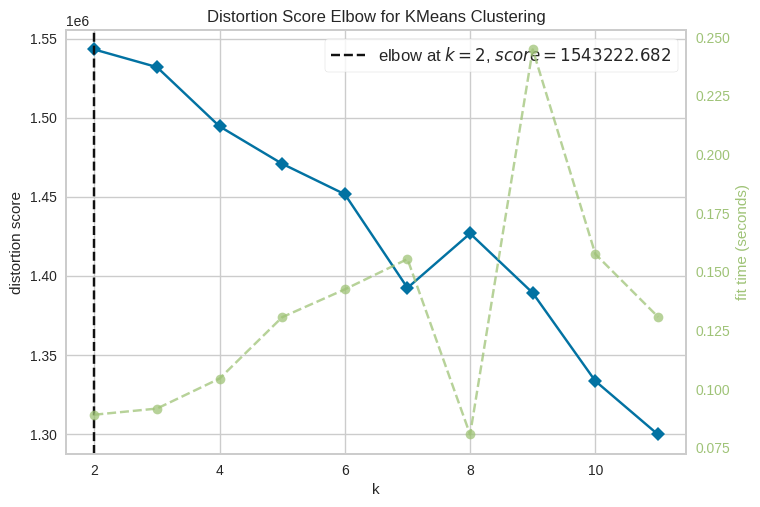

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

In [28]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=8, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
cluster_df['cluster']=clusters

cluster_df.info()

# Evaluate cluster sizes to insure that they are similar
print(cluster_df['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = cluster_df.groupby('cluster').mean()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
     print(df_desc)

<class 'pandas.core.frame.DataFrame'>
Index: 18510 entries, 0 to 22222
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                18510 non-null  float64
 1   DemAge                 18510 non-null  float64
 2   PromSpend              18510 non-null  float64
 3   PromTime               18510 non-null  float64
 4   TargetBuy              18510 non-null  float64
 5   TargetAmt              18510 non-null  int64  
 6   DemCluster_2.0         18510 non-null  float64
 7   DemCluster_3.0         18510 non-null  float64
 8   DemCluster_4.0         18510 non-null  float64
 9   DemCluster_5.0         18510 non-null  float64
 10  DemCluster_6.0         18510 non-null  float64
 11  DemCluster_7.0         18510 non-null  float64
 12  DemCluster_8.0         18510 non-null  float64
 13  DemCluster_9.0         18510 non-null  float64
 14  DemCluster_10.0        18510 non-null  float64
 15  DemClus